In [77]:
import pandas as pd
import sklearn as sk  
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib as plt
import matplotlib.pyplot as pplt
import numpy as np
import seaborn as sb

In [78]:
df = pd.read_csv("electricity.csv")
df.head()

,year,area,type,temperature,humadity,motion,latitude,longitude,consumption,slice
0,2007,Central,Residential,25,29,0,31.262390,30.571695,28928580,2.0
1,2005,Central,Residential,28,26,1,31.402464,30.214165,24491767,2.0
2,2017,Central,Residential,35,26,0,31.231032,30.516337,48187136,3.0
3,2013,Central,Residential,22,41,0,31.575954,30.942856,39579812,2.0
4,2009,Eastern,Residential,28,74,0,31.700896,30.761473,19401996,1.0


In [79]:
df=df[df['year'] <2020]
df['year'].head()

0    2007
1    2005
2    2017
3    2013
4    2009
Name: year, dtype: int64

In [80]:
df.describe()

,year,temperature,humadity,motion,latitude,longitude,consumption,slice
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,3.780000e+02,377.000000
mean,2011.174603,31.428571,47.968254,0.521164,31.480550,30.493611,1.550103e+07,1.440318
std,3.802999,6.828434,16.319393,0.500214,0.287768,0.290130,2.339420e+07,1.030011
min,2005.000000,20.000000,20.000000,0.000000,31.001422,30.000001,5.267400e+04,1.000000
25%,2008.000000,26.000000,35.000000,0.000000,31.227423,30.247093,2.348974e+06,1.000000
50%,2011.000000,31.000000,49.000000,1.000000,31.478617,30.484963,5.976446e+06,1.000000
75%,2014.000000,38.000000,62.750000,1.000000,31.737699,30.761374,1.931426e+07,1.000000
max,2019.000000,42.000000,75.000000,1.000000,31.994727,30.996958,1.440407e+08,7.000000


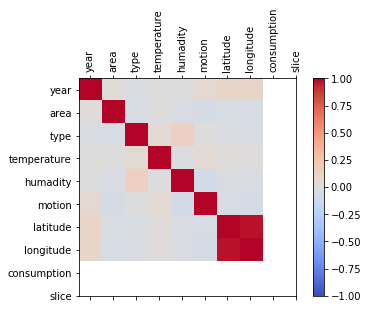

In [81]:
corr = df.corr()
fig = pplt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
pplt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
pplt.show()

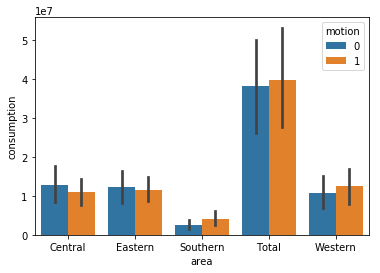

In [82]:
sb.barplot(data=df, y='consumption', x='area', hue='motion')

pplt.show()
#pplt.clf()

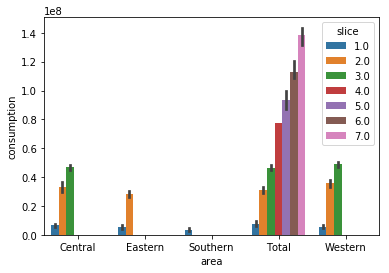

In [61]:
sb.barplot(data=df, y='consumption', x='area', hue='slice')

pplt.show()
pplt.clf()

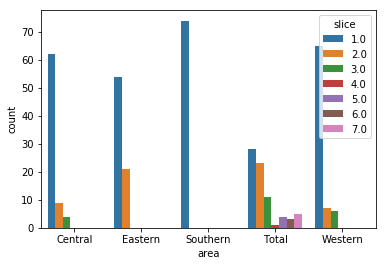

In [62]:
sb.countplot(data=df, x='area', hue='slice')

pplt.show()
pplt.clf()

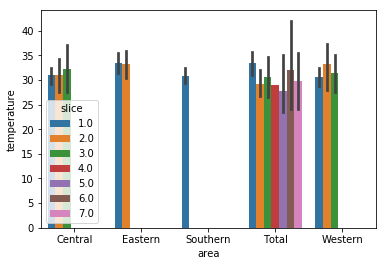

In [63]:
sb.barplot(data=df, y='temperature', x='area', hue='slice')

pplt.show()
pplt.clf()

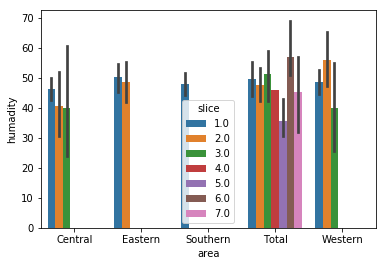

In [64]:
sb.barplot(data=df, y='humadity', x='area', hue='slice')

pplt.show()
pplt.clf()

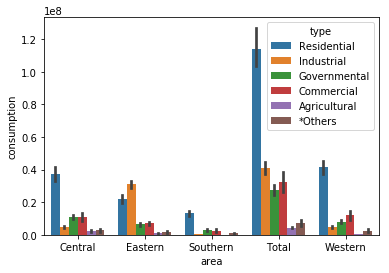

In [65]:
sb.barplot(data=df, y='consumption', x='area', hue='type')

pplt.show()
pplt.clf()

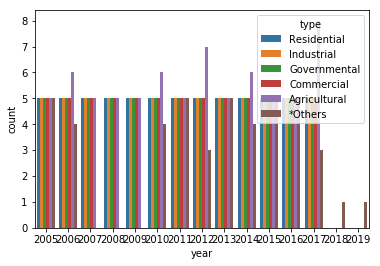

In [66]:
sb.countplot(data=df, x='year', hue='type')

pplt.show()
pplt.clf()

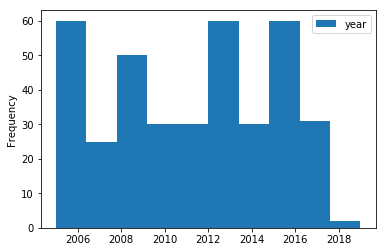

In [67]:
df.plot(x='consumption', y='year', kind='hist');
pplt.show()

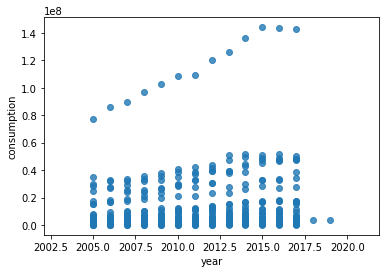

In [68]:
sb.regplot(data=df,
y='consumption',
x="year",
fit_reg=False)
pplt.show()
pplt.clf()

In [83]:
encs = {}
for i in df.columns:
    if df[i].dtypes == 'O':
        encs[i] = LabelEncoder() 
        df[i] = encs[i].fit_transform(df[i])

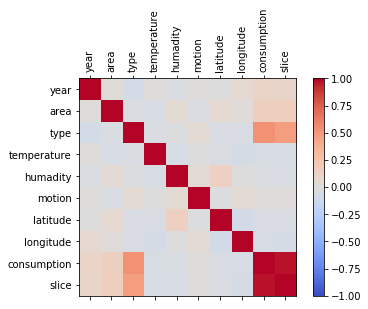

In [84]:
corr = df.corr()
fig = pplt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
pplt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
pplt.show()

In [99]:
X = df.iloc[:, 1:7 ].values
y = df.iloc[:, 9].values

In [100]:
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 0)

In [102]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [103]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [104]:
y_pred = classifier.predict(X_test)

In [105]:
cm = confusion_matrix(y_test, y_pred)
cm


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [106]:
score = accuracy_score(y_test, y_pred)
score

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc_KNN = StandardScaler()
X1_train = sc_KNN.fit_transform(X1_train)
X1_test = sc_KNN.transform(X1_test)

In [109]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 3)
classifier.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='uniform')

In [110]:
y1_pred = classifier.predict(X1_test)

In [111]:
score1 = accuracy_score(y1_test, y1_pred)
score1

ValueError: Classification metrics can't handle a mix of continuous and binary targets

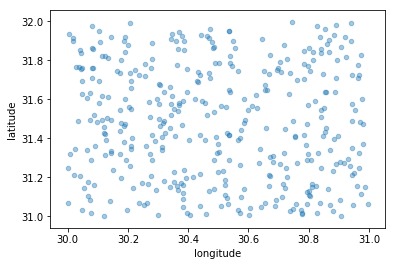

In [98]:
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4)
pplt.show()